
# TRAINING 
<u>HuyHT5_DR 20180817</u>
 
### 1. Tasks: 
    * Tìm hiểu về các mạng CNN
    * Implement Chainer


### 2. On-going Tasks 

    * Overview
        * Alexnet (2012) 
        * VGG (2014) 
        * Resnet (2015) 
        * GoogleNet-Inception
        * SqueezeNet (2016)
    
    * Model Processing
        * Prunning CNN 
        
    * Other 
        * Feature Maps
        * Vanishing / Exploding Gradient Problems 
        * Bath Nomarlization (updated 2018-08-17)
        * Bottleneck Layer
        * L1/L2 Mean (not yet)
        
    * Basic Chainer 
        * Phần Guides
        * Write Neural Networks By Chainer 
            * Alexnet (Chainer)
            * VGG16 (Chainer)
            * Resnet (Chainer)
            * Inception-v3 (Chainer)
            * SqueezeNet (Full_Code Pytorch)
            * 
    * Combine study and implement model by Chainer


### 3. Questions 

	1.Tỉ lệ ratio Dropout trong mạng (F.dropout(h, ratio=0.5, train=train)) có thể thay đổi không? Có thể Thay đổi bao nhiêu để tăng hiệu quả giảm thiểu overfitting? (HuyHT5 - 2018-08-15)
   ---> A.  Dropout thay đổi đc. Giá trị thông thường là 0.3-0.7. Giá trị càng cao (drop nhiều) thì càng ít overfit, nhưng risk mất thông tin dẫn đến underfitting **(A. Nghĩa - 2018-08-15)**
    
    2.Từ mạng Alex, tác giả đã dùng kernel size là 11x11 cho lớp Conv đầu tiên và 5x5 cho Conv tiếp theo. Đến các VGG và ResNet, tác giả đã chọn kernel size là 3x3 (Is thís best thing?). Và Inception-V3 là dùng cả 1x1, 3x3, 5x5 và 7x7
    Chọn loại Convolution (Kernel size) với 11x11 ,1x1 or 3x3 or 5x5 or 7x7? Tại sao không chọn cả tất cả? Nếu không tốt, tại sao nó lại không tốt? (HuyHT5 - 2018-08-16)
    
   ---> Kernel size thế nào là best hiện chưa ai chứng minh được. Các con số họ đưa ra hầu hết dựa vào kết quả thực nghiệm. Việc kernel size lớn thì chi phí tính toán tăng là đúng. Tuy nhiên dùng kernel nhỏ cũng chưa hẳn đã tốt, vì kernel to biểu diễn đc hàm số phức tạp hơn. Kernel 1x1 có nhiệm vụ đặc biệt là làm giảm độ sâu ở lớp kế tiếp. Kernel nhỏ nhất thường dùng là 3x3. **(A. Nghĩa - 2018-08-16)**
   
    3. Weight Initialization là vấn đề trong Network Train và là vấn đề lớn khi mình có một Deeper Network.
    
    - Tại sao Batch Normarlization giúp dễ  dàng trong việc khởi tạo Weights cho Network?
    
    4. Hiện tại có nhiều cách để giúp khởi tạo Weights như 1: zero initialization, random initialization, he-et-al initialization.
    
    - Việc Weight Initialization ảnh hưởng như thế nào đến Network.
    
    Ex: Nêú khởi tạo tất cả trọng số bằng 0 cho tất cả layers cùng giống về cách tính toán. Các weights cũng sẽ giống nhau và output sẽ cho ra kết quả luôn luôn giống nhau. (Em hiểu như vậy có đúng không ạ?)
    
    5. Việc đặt decay learning rate như thế nào tốt cho vấn đề hội tụ của gradient. Ví dụ, decay learning rate cho mỗi epoch với tỉ lệ giảm 0.96. hay mỗi 5, 10, or 20


- Idead của ReLU: việc tính đạo hàm đơn giản nên giúp mạng nhanh hơn. Qua activation để nolinear. Và tính đạo hàm tại Backgro. Giảm vanishing radient problem. Tính toán của ReLU rất đơn giản.

- 

# General

# --------------------------Alexnet--------------------------
![title](Doc/alex.png)

#### Model Architecture:

    - Input: 227x227x3 (Kích thước images sẽ được crop)
    - CONV Layers: 5conv (Phần Feature Extractor)
    - Fully Connection layers: 3 fc (Phần Classifier)
    - FC6 (4096 nodes) → FC7 (4096 nodes)
    - Ouput: 1000 (Sử dụng Softmax với 1000 output classes )
    
#### Parameters
    - Kiến trúc mạng Alexnet có 60 triệu params  (Using ReLU activation func)
    
#### Hightlights

    - Thay vì sử dụng Sigmoid hoặc Tanh func thì, tác giả đã dùng ReLU activation func. Nó làm tăng tốc hơn gấp 5 lần so với các activation func khác vì khi tính đạo hàm của ReLU đơn giản hơn nhiều.
    
    - Với số lượng tham số lớn với 60 triệu params trong mạng, để giảm thiểu overfitting, ngoài cách thức tăng lượng data (Data Augmentation), thì tác giả đã sử dụng Dropout. Nó sẽ set về zero   ngẫu nhiên các node trong Hidden Layer with xác xuất 0.5. Dropout nó sẽ bỏ qua update lại weight vì không làm  gì cả trong khi backpropagation. Công nghệ này giảm thiểu độ phức tạp của mạng.
    
#### Experiment

ILSVRC-2012 dataset(1000 classes): 

    - Training (1.3M images)
    - Validation (50K images)
    - Testing (100K images with held-out class labels). 

#### Result:

    - Top 5 Error of AlexNet: 15.3%
#### Reference
ImageNet Classification with Deep Convolutional Neural Networks

https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf

# ---------------------------VGG----------------------------

![title](Doc/vgg.png)
#### Model Architecture:
    - Input: 224x224x3 (Kích thước images sẽ được crop)
    
    - Tại lớp Feature Extractor: Cải thiện hơn Alexnet với việc biểu diễn đơn giản hơn bằng cách chỉ sử dụng Lớp Conv  3x3 để tăng độ sâu cho mỗi lần output. Sau đó, giảm kích thước cho mỗi output của các lớp Conv bằng cách sử dụng Max Pooling 
    
    - Tại Classifier: có 2 lớp Fully Connected layer (FC) với:
 		FC1(4096 nodes) → FC2 (4096 nodes) → Output (1000 classes)

#### Complexity
<img src="Doc/vgg.jpg" alt="Drawing" width="500"/>

                Với A ,B ,C là những điều chỉnh cho số lớp. 
#### <u>Ex</u>: 
Vgg16 với kiến trúc tại cột C Configuration, Vgg19 với cột E  Configuration

#### Number of Parameters

![title](Doc/vggp.jpg)

                Parameters của mỗi kiến trúc (đơn vị là Milions)
                
#### Experiments
ILSVRC-2012 dataset(1000 classes): 

    - Training (1.3M images)
    - Validation (50K images)
    - Testing (100K images with held-out class labels). 

#### Result
![title](Doc/exp.jpg)

#### Reference

Very Deep Convolutional Networks for Large-Scale Image Recognition

https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf

# --------------------------Resnet-------------------------

<img src="Doc/r.png" alt="Drawing" width="400"/>

![title](Doc/r.jpg)



#### What problem does ResNet solve?
    * Có môt vấn đề  là:
        
        "When deeper networks starts converging with the network depth increasing, accuracy gets saturated and then degrades rapidly."
        
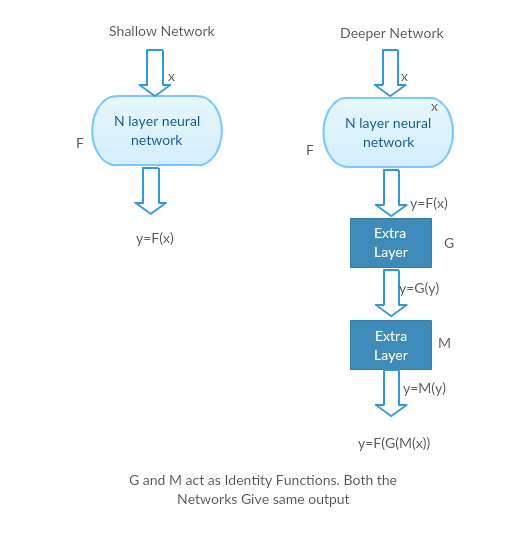
        
#### To Solve
* Thay vì học trực tiếp từ Input -> Output với H(x) functions. Resnet định nghĩa Residual function dưới dạng:

    F(x) = H(x) — x or H(x) = F(x)+x , với:
    
        * Hàm F(x): x là các lớp phi tuyến xếp chồng lên nhau

![title](Doc/restnet1.png)

***Sumup: Các model mạng càng sâu, thì các khối sẽ Conv theo chiều sâu của mạng trở thành các mạng nhỏ riêng biệt. Điều này gây ra việc các Output của các khôi này sẽ giống nhau. Ý tưởng ở đây là tác giả sử dụng lượng thông tin x + output (F(x)) của để giữ không cho thông tin gốc bị mất đi. Sau đó, đưa vào khối tiếp theo.
           
#### Kinds of residual connections

* Residual block function when input and output dimensions are same
![title](Doc/ct1.png)

* Residual block function when the input and output dimensions are not same
![title](Doc/ct2.png)
.        
                
#### Experiments
* ILSVRC-2015 dataset
* COCO 2015 

#### Result
![title](Doc/resn.png)

    * Top-5 error rate: 3.57% 
    * Thay thế VGG-16 layers trong Faster R-CNN sử dụng ResNet-101. Mức cải thiện lên 28%
    * Training hiệu quả với cả 100 layers và 1000 layers

#### Reference
Understanding and Implementing Architectures of ResNet

https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624

# --------------------------GoogleNet Inception-V3-----------------------

![title](Doc/googlen1.png)

## Inspiration

Sau mạng Resnet152 rất sâu ra đời, thì theo xu hướng sáng tạo về mặt công nghệ. Google muốn tạo ra một mạng sâu hơn nửa.
    
## Problem
 1. Chọn loại Convolution (Kernel size) 3x3 or 5x5? Tại sao không chọn cả tất cả? 
 
## Architecture

![title](Doc/googlen2.png)

Tác giả sử dụng cả Kernel 1x1, 3x3, 5x5 cùng với max pooling size 3x3.

Tác giả cũng đề cập đến kernel 1x1 để giảm kích thước của Feature Maps của nó vì với kernel size lớn sẽ dẫn đến chi phí chi tính toán cũng lớn hơn. 

Đưa các kết quả feature maps (1x1 Kernel) vào reLU, sau đó làm việc với các kernel lớn hơn là (3x3 or 5x5) 

## How to reduce dimensionality 

Sử dụng kernel 1x1 để giảm kích thước của Input đến các Conv lớn, do đó nó có thể giữ hợp lí cho việc tính toán.

Bảng 1.1
![title](Doc/googlen3.png)
    

    ## 1. Chúng ta có thể xem xét về bài toán:
![title](Doc/googlen4.png)

  ### <u>Input 28x28x192 - Kernel 5x5 - Feature Maps 32x28x28:</u>
  ### Với 5^2(28)^2(192)(32)=120,422,400 operations.


    #2. Đới với trường hợp sau:

![title](Doc/googlen5.png)

Với kernel 1x1 đặt trước kernel 5x5 và output là 28x28x16 (tra tại bảng 1.1) 
![title](Doc/googlen6.png)

Và chi phí tính toàn giảm khoảng 10 lần so với kiến trúc model tuyền thống.

## What is the auxiliary classifiers?

![title](Doc/googlen7.png)

GoogleNet có 9 modules xếp chồng tuyến tính lên nhau:

    * 22 layers deep (là 27 layers nếu tính cả pooling layers)
    * Đây là bộ Deep classifier
    
Inception là Bộ phân loại rất sâu, nó dẫn đến tình trạng Vanishing Gradient Problem như bất kì các mạng khác.

Để ngăn chặn 3 phần của GoogleNet bị **Dying Out** vì mạng quá sâu thông tin bị mất dần khi lan truyền qua các hidden layer, tác giả đã sử dụng **2 auxiliary classifiers (Softmax)** để làm 2 output cho module 
            
### The total loss used by the inception net during training.
### Weight value used in the paper was 0.3 for each auxiliary loss.
  **total_loss = real_loss + 0.3 * aux_loss_1 + 0.3 * aux_loss_2**
    
#### Problem

Trên thực tế gradients thường sẽ có giá trị nhỏ dần khi đi xuống các layer thấp hơn. Kết quả là các cập nhật thực hiện bởi Gradient Descent không làm thay đổi nhiều weights của các layer đó, khiến chúng không thể hội tụ và DNN sẽ không thu được kết quả tốt. Hiện tượng này được gọi là Vanishing Gradients.

## Reference
A Simple Guide to the Versions of the Inception Network
https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202


# -----------------------------------SqueezeNet-------------------------------

## Introduction And Motivation
    * Muốn đưa model vào các Mini-PC , smartphone, các FPGAs
    * Thông thường các thiết bị chỉ sử dụng CPU, và cố bộ nhớ nhỏ, FPGA (10 MB)
    * Model nhỏ, giảm lượng params trong model nhưng vẫn giữ được  Accuracy tương đương.

## General
    * SqueezeNet cung cấp một kiểu cấu trúc thông minh về những phân tích định lượng cho network.
    * Có thể đạt được Alexnet's Accuracy, nhưng nhanh gấp 3 lần và nhỏ hơn 500 lần Alexnet
    
![title](Doc/sq.png)

## ARCHITECTURAL DESIGN STRATEGIES

    1. Vì cần làm nhỏ model, số lượng Conv cũng phải hạn chế , bằng cách sử dụng các filter size 1x1 để thay thế cho các filters 3x3 để giảm số params (lượng params 1x1 nhỏ hơn 9 lần 3x3 filter). 
    
    2. Giảm số Input Channel to 3x3 filters(3x3) bằng cách sử dụng Squeeze layer. Xém xét 1 Conv1 là 3x3 filter. Tổng số params trong layer này là
    
    (number of input channels) * (number of filters) * (3*3)
    
    96 * 16 * 3 * 3 = 13824 params
    
    
    
    3. Thực hiện Downsampling (max pooling )
       - Nếu các layer ở trước trong network, đặt downsampling với số stride lớn, thì hầu hết output của các layers là các activation maps nhỏ.
       - Ngược lại, Các layer được đặt downsampling với stride 1 và lớn hơn 1 được tập trung vào cuối network thì sẽ ouput ra activation maps lớn. 
       - Và, Nếu có các large Feature maps (applied delayed downsampling) có thể đưa đến Accuracy cho Classification cao hơn so với các mạng khác tương đương. 
    
    
P/s Giống như mạng Inception thì Google đã sử dụng filter 1x1 để giảm dimension của feature trước khi đưa vào Conv layer lớn hơn (3x3, 5x5). Điều này giúp giảm chi phí tính toán cho mạng.


## Fire Modules

SqueezeNet sử dụng Fire Module thay cho Conv Layers. 

  - Với kiểu Arch này theo ý tưởng 
       * Dùng 1x1 filter để giảm sô Params ( idea 1)
       * Thông qua 1x1 filter ngay ban đầu để giảm số Input Channel (idea 2)
    
## SqueezeNet Architecture

![title](Doc/sqck1.png)


![title](Doc/sqck2.png)

* Có 2 layers: Squeeze layer và Expand layer.
    - Sử dụng 2 Convolutional Layer (Conv1,Conv10)
    - Xếp chồng các Fire Modules (Fire 2- 9) lên với nhau
    - Max Pooing thì đặt vào sau các block conv1, fire4, fire8, conv10
    - Squeeze layer và Expand layer giữ cùng Feature Map size.


## Try to do 

* Fire Modules chưá 1 Squeece Layer 1x1 filter và  Expand layer (1x1 và 3x3 filter).
* Nếu chúng ta lâys Fire2 thì Input của Fire2 sẽ là  55x55x96
* Lấy 1x1 Filter với depth là 16 -> Return ouput là 55x55x16
* Sau đó, 55x55x16 đưa vào 2 Conv là 64 1x1 và 64 3x3. Kết hợp 2 ouput sé là 55x55x128


![title](Doc/sqck3.png)

* Mỗi Fire Layer có layer nên, ý chỉ số depth = 2 (gồm  squeeze layer và theo sau là expand layer)


** Param = ((n*m*l)+1)*k = ((3*3*l)+1)*32 = 18,464, With: **
    . Input 28*28*64
    . m=n=3 is the size of the kernel 
    . l=64 is the number of channels in the input
    . k=32 is the number of filters
    . The +1 is used to add the biases.
     
    
### Thử tính lượng params tại fire2 trước khi prunning

#### Tại Layer 1 - The Squeeze Layer - S(1x1)
l = 96, m = n = 1 and k = 16

**((n*m*l)+1)*k = ((1*1*96)+1)*16 = 97 * 16 = 1552

#### Tại Layer 2 - The expansion layer

##### Kernel size 1 - e1x1
l=16, m=n=1 and k=64. 

**((n*m*l) + 1) * k = ((1*1*16)+1) * 64 = 1088

##### Kernel size 3 - e3x3
l=16, m=n=3 and k=64.

**((n*m*l) + 1) * k = ((3*3*16)+1) * 64 = 9280

#### Total

 **1,552+1,088+9,280 = 11,920
 
 
## Other SqueezeNet Details

 

## -------------- Example from Inception --------------------
![title](Doc/googlen4.png)

  ##### <u>Input 28x28x192 - Kernel 5x5 - Feature Maps 32x28x28:</u>
  #### Với 5^2(28)^2(192)(32)=120,422,400 operations.


![title](Doc/googlen5.png)

Với kernel 1x1 đặt trước kernel 5x5 và output là 28x28x16 (tra tại bảng 1.1) 
![title](Doc/googlen6.png)

Và chi phí tính toàn giảm khoảng 10 lần so với kiến trúc model tuyền thống.
    
## Sumup

Với idea 1 và 2 là chiến lược giảm số params trong mạng, để có thể chi phí tính toán
Idea 3 nhiệm vụ chính là giữ cho độ chính xác được bảo toàn.

## Experiment

* Using Pytoch to implement SquezeeNet-None 1.0

* Dataset: CiFAR10

* Saved Model: 3.0 MB (3,018,880 bytes) (Alexnet size is 240MB)

* P/s: - With Epoch 1~ 5, GPU Performance was 70~90%.  
    
       - But, when step over Epoch 6~55, GPU performance was sometimes for 5%, 50%, and 0% for all of the remain epoch 
       
       - I didn't know why it had gone down GPU performance like that. 

![title](Doc/Net_loss.jpg)


![title](Doc/sqacc.png)

    
## Reference
SQUEEZENET: ALEXNET-LEVEL ACCURACY WITH
50X FEWER PARAMETERS AND <0.5MB MODEL SIZE

https://arxiv.org/pdf/1602.07360.pdf

Notes on SqueezeNet

https://medium.com/@smallfishbigsea/notes-of-squeezenet-4137d51feef4

# ---------- Prunning Convolutional NN ------------

## ASTRACT 

* Tác giả xem kẻ việc criteria-based prunning (cắt tỉa dựa trên tiêu chí) với finetuning by Backpropagation
    - Đảm bảo việc tính toán hiệu quả, dẫn đến Good generalization (Tính tổng hóa) trong mạng đã prune
    
* Tác giả giới thiệu 1 tiêu chí mới dựa trên Taylor Expansion (TE). TE 

* Tác giả focus vào Transfer learning, bởi vì các mạng có  pretrained lớn đáp ứng cho các công việc đặc biệt.

* Tác giả đã chứng minh ý tưởng của mình bằng việc pruning VGG16, speedup x3, downsize x4

## Problem

- Nhúng các Deep Learning models vào các thiết bị sử dụng CPU và memory nhỏ như Smartphone, Camere giám sát, FPGA, mini-pc  
    
## General

- Pruning các filter của CNN, làm nhẹ model. Bằng idead là trong nhiều params trong network, sẽ có một số cái dư thừa và không đóng góp gì đến ouput

- Với đặc điểm này, nếu đánh rank chỉ số contribute của các Nerons. Điều này  có thể remove đi các Low Ranking Nerons, làm cho Network smaller and faster

- Sau khi pruning Accuracy sẽ bị drop và network phải tiếp tục trained nhiều hơn để phục hồi lại Accs.
    
    P/s: Nếu pruning một lúc prune quá nhiều, network sẽ bị phá hủy, không thể phục hồi lại dc 

- Có rất nhiều papers về pruning, nhưng một vài lí do sau đây làm cho nó không hoạt động tốt:

    - Việc ranking không đủ tốt ---> Accuracy is dropped strongly (T.T)
    - Implement khó khăn
    - Những người sử dụng kỹ thuật pruning, không chia sẽ, giữ lại như một bí mật

## How to prune

- Ranking có thể triển khai theo L1/L2 mean của Neron Weights, Mean Activation của các nerons, sô lần neuron được tính về zero trong khi Valuaion....

## Flow for Pruning Model

** Iterative Pruning: Prune/Train/Repeat



![title](Doc/pruning_steps.png)

## Where is pruning in Network?

- Trong VGG16:
    - 90% weights nằm trong Fully Connected layer (FC), 1% chiếm tổng số điểm đó hoạt động.
    - Các công việc hầu hết tập trung vào phần FC, cắt tĩa nhưng điểm dư thừa, model size cũng có thể giảm đáng kể

- Tác giả cũng sẽ tập trung vào việc prune các filter tại CONV Layers.

- Nhưng nó gây ảnh hưởng tới việc giảm memory, có nghĩa là lúc lớp CONV cuối cùng sẽ bị prune quá nhiều và dồng thời các neuron tại FC kế đó cũng phải bik bỏ đi.

- Khi pruning Conv Filter, hoặc là giảm weights trong mỗi filter, hoặc là remove 1 độ lớn (a specific dimension) cụ thể nào đó của 1 Kernel. Khi filter trở nên thưa thứa, nó không giúp cho việc tính toán nhanh hơn. 

**P/s: Một điều khá quang trọng trong bài báo đề cập đến là "Đầu tiên là training , sau đó pruning một Larger Network, đặc biệt là trong Transfer Learning, Chúng đem lại kết quả tốt hơn nhìu so với các mạng nhỏ được cái mà được training từ đầu"**

   From Source: "is that by training and then pruning a larger network, especially in the case of transfer learning, they get results that are much better than training a smaller network from scratch."
   
## Briefly review 

### Pruning filters for effecient convnets

Paper: https://arxiv.org/abs/1608.08710

![title](Doc/prune1.png)   

Trong bài báo này, tác giả đã pruning các CONV filters 

- Pruning các filter không quan trọng trên bằng cách tính tổng weight L1-norm.

- Các Filters với weights của Kernel nhở hơn, có nghĩa việc tạo ra các feature maps bằng các giá trị activation yếu. Nó sẽ được đem đi so sánh với các cái activation node khác. 

- Tác giả thấy rằng việc pruning các weight kernel nhỏ nhất mang lại hiệu quả tốt hơn khi pruning một cách random or các filter lớn nhất

- Pruning một filter với index k, ảnh hưởng đến các layer mà nó nằm trông đấy.

- Tất cả các input channels tại index k của lớp phía sau sẽ bị remove hoàn toàn. Nó sẽ không còn còn tại khi bị pruning nửa.

- Trong trường hợp lớp phía sau là FC layer, kích thước Feature Map của kênh đó là MxN, thì  MxN neurons tại FC sẽ bị remove tương tương.

- Việc Ranking cũng đơn giản, chỉ cần L1 Norm cho Weights trên mỗi filter. Mỗi lần pruning chúng ta rank tất cả filter, lấy khoảng m ranking filter thấp nhất sẽ bị pruned trên toàn tất cả layer, retrain và repeat.

### Structured Pruning of Deep Convolutional Neural Networks

Paper: https://arxiv.org/abs/1512.08571

Trong bài báo này, cách làm cũng tương tự



- Nhưng, việc ranking xử lí phức tạp hơn nhiều. 
    
    * 1 tập hợp N filters, cái sẽ đại diện cho N CONV filters bị pruned
    
    * Each particle is assigned a score based on the network accuracy on a validation set, when the filter represented by the particle was not masked out. Then based on the new score, new pruning masks are sampled. (Không hiểu)
    
    * Việc running process này khá nặng, nên tác giả đã xem xét triển khai tính toán số điểm với tập validation nhỏ.
    
###  Pruning Convolutional Neural Networks for Resource Efficient Inference (*)

Đầu tiên, họ coi vấn đề pruning là bài toán tối ưu hóa tổng hợp:

![title](Doc/prune2.png)  

- Chọn 1 tập con của weights B như trên hình, như vậy khi pruning sẽ giảm được Cost Change ở mức thấp nhất.

- Sử dụng giá trị tuyệt đối ở đây, phải triển khai sao cho pruned network sẽ không giảm preformance quá nhiều. 

## Oracle pruning


![title](Doc/taylor1.png) 

![title](Doc/taylor2.png) 

> C(W, D) is the average network cost function on the dataset D
> Weights are set to W
> Evaluate C(W, D) as an expansion around C(W, D, h = 0)

- VGG16 có 4224 Conv filters. 

- Để đánh ranking, tác gỉa dùng phương phấp brute-force-prune (Duyệt Trâu - Duyệt từ a đến z) trên mỗi filter.

- Sau đó, quan sát sự thay đổi của Cost Function trong khi training. 

- Họ cũng đưa ra một phương pháp để đánh ranking neuron mới dựa trên Taylor Expension (tính toán khá nhanh ) cho Network Cost Function

**P/s: Prunning một filter h giống như là đư filter đó về 0**
**     Việc đánh giá C(W, D) và C(W, D, h = 0) nên gần bằng nhau, chứng minh việc prune 1 số filter không làm ảnh hưởng đến cost quá nhiều**

- Còn việc đánh ranking bằng L2 norm, thì được cho là dựa theo kinh nghiệm. Nhưng nó đem lại chất lượng khá tốt khi pruning

- Tác giả đã dùng cả activation và gradient như là Ranking Methods. Nếu bất cứ cái nào có high values, có nghĩa nó có contributed đến đầu ra.

## Step By Step To Pruning

### Step One - Train A Large Network

- Sử dụng VGG-16, drop đi lớp FC cũ, and thêm 3 lớp FC mới. 
- Sau đó, Freeze tất cả Conv Layers, 
- Retrain chỉ 3 lớp FC mới

```
    self.classifier = nn.Sequential(
	    nn.Dropout(),
	    nn.Linear(25088, 4096),
	    nn.ReLU(inplace=True),
	    nn.Dropout(),
	    nn.Linear(4096, 4096),
	    nn.ReLU(inplace=True),
	    nn.Linear(4096, 2))
        
```
-> Sau khi training khoảng 20 epochs thì đạt được độ chính xác 98.7% trên test set

### Step Two - Rank The Filters

- Để tính toán Taylor Criteria, cần thực hiện Forward + Backward  trên tập dữ liệu của mình. Hoặc 1 phần nhỏ nếu data quá lớn.

- Tiếp theo, bằng cách nào để  lấy được cả Gradient và Activation for Conv Layers. Trong Pytorch, có thể register a hook trên Gradient Computation, 

```
# Get Activation

for layer, (name, module) in    enumerate(self.model.features._modules.items()):
	x = module(x)
	if isinstance(module, torch.nn.modules.conv.Conv2d):
		x.register_hook(self.compute_rank)
		self.activations.append(x)
		self.activation_to_layer[activation_index] = layer
		activation_index += 1
```


- Bây giờ, đã có activation in self.activation, Gradient cũng sẵn sàng, tính toán Rank

```
def compute_rank(self, grad):
	activation_index = len(self.activations) - self.grad_index - 1
	activation = self.activations[activation_index]
	values = \
		torch.sum((activation * grad), dim = 0).\
			sum(dim=2).sum(dim=3)[0, :, 0, 0].data
	
	# Normalize the rank by the filter dimensions
	values = \
		values / (activation.size(0) * activation.size(2) * activation.size(3))

	if activation_index not in self.filter_ranks:
		self.filter_ranks[activation_index] = \
			torch.FloatTensor(activation.size(1)).zero_().cuda()

	self.filter_ranks[activation_index] += values
	self.grad_index += 1
```

**For example, if the batch size was 32, the number of outputs for a specific activation was 256 and the spatial size of that activation was 112x112 such the activation/gradient shapes were 32x256x112x112, then the output will be a 256 sized vector representing the ranks of the 256 filters in this layer.**

- N là số tập hợp các ranking filter thấp nhất. Sử dụng N=512. Chúng ta sẽ remove 12% from 4224 Conv Filters.

### Step 3 - Fine tune and repeat

- Ở giai đoạn này, bỏ freeze tất cả layers và retain Network for 10 epochs, đủ để đạt được kế quả tốt từ dataset

- Sau back về Step 1 với mạng đã được thay đổi và lặp lại

## Experiment

### Conclusion

- Dataset: Dogs and Cats Datasets from the Kaggle, with 
    * Train

            ......... dogs -> 1000 Images

            ......... cats -> 1000 Images

    * Test

            ......... dogs -> 400 Images

            ......... cats -> 400 Images
           
- After Prunning is model as:    
    * train_model size is **537.1 MB (537,102,059 bytes)**
    * prunned_model size is **148.1 MB (148,140,795 bytes)**
    
    
- Time to infer
    * train_model is 4.550 sec
    * prunned_model is 2.30122 sec
    
    
- Total of the Filter in Network
    * train_model is 4224 filters
    * prunned_model is 1664 filters

### Step 1: Build a new Classifier with own dataset

![title](Doc/prune3.png)

### Step 2: Load trained model from step 1 to prune

* With 10 epoch for each iteration (has 3 iters) for prunning and trained more and more, to recover Accuracy after removing unimportant filters

![title](Doc/prune4.png)
![title](Doc/prune5.png)

### Step 3: Test both official pretrained model and prunned model

    #### Official Pretrain Model
![title](Doc/prune7.png)

    #### Prunned Model
![title](Doc/prune6.png)



## Reference
Pruning deep neural networks to make them fast and small

https://jacobgil.github.io/deeplearning/pruning-deep-learning

# Other

## ------------------------------------Featute maps (Activation Maps): 

https://computersciencewiki.org/index.php/Feature_maps_(Activation_maps)

![title](Doc/featurem.png)

    Đây được coi như là một tập hợp của các đặc trưng bằng việc detect được từ các kernel (tại Conv layer) như đường cong, edge... 
<u>Ví dụ:</u> Tại Conv1 chúng ta thu được 1 set các đường cong, thẳng... của một chiếc xe đạp. kết hợp với set các cạnh, góc rõ ràng hơn như nửa bánh xe, bàn đạp... để có thể dự đoán đó là chiếc xe đạp.

## ------------------------------------Vanishing / Exploding Gradient Problems
   
   Backpropagation Algorithm sẽ **tính toán** gradient của Cost Functions tương ứng với từng weights của network, từ output ngược trở về lại input.
    Sau đó, Gradient Descent sẽ được dùng để cập nhật các weights params cho đến khi params của network hội tụ. Nhưng,
    
      * Nếu số lượng vòng lặp quá nhỏ -> Bad result
      * Nếu số lượng vòng lặp quá lớn -> Take long time for training
   
   Thực tế, qua quá trình thực địa, gradient thường sẽ có giá trị nhỏ dần (gần như bằng zero) khi đi xuống các layer thấp hơn. Điều này gây ra việc Gradient Descent không làm thay đổi quá nhiều weights của các layer và không thể hội tụ. Mạng sẽ không cho ra kết quả tốt.
   
   ----> **Vanishing Gradients.**
   
   Trong nhiều trường hợp khác, gradients có thể có giá trị lớn hơn trong quá trình backpropagation, khiến một số layers có giá trị cập nhật cho weights quá lớn khiến chúng phân kỳ (phân rã), tất nhiên DNN cũng sẽ không có kết quả như mong muốn. Hiện tượng này được gọi là Exploding Gradients, và thường gặp khi sử dụng Recurrent Neural Networks (RNNs).
   -----> **Exploding Gradients.**
   
   ### How to prevent Vanishing / Exploding Gradient Problems
* Xavier and He Initialization Techniques (X)
* Nonsaturating Activation Functions (X)
* Gradient Clipping (X)
* Batch Normalization (Overview)

## ------------------------------------Batch Normalization
      
### 1. Why do use Normalization?
   
         - Chúng ta điều chỉnh và chia tỉ lệ cho các hàm kích hoạt. Feature thì từ 0-1 và cũng sẽ có các feature từ 1-1000. Vì vậy, phải chuẩn hóa (normalize) chúng để tăng tốc việc học (Learning).
         - Thay vì chỉ normalize các input đến Network, Việc chuẩn hóa cho các inputs đến hidden layer giúp việc tăng tốc và cải thiện cho tốc độ training lên gấp 10 lần.
         
### 2. Batch Normalization (BN) is helpful
      
          - Giúp có thể sử dụng learning rate cao hơn tằng tốc độ cho Network Train, bởi vì BN có  đã chuẩn hóa các batch data đầu vào mà không có cái nào quá cao or quá thấp. Gradient Decent thường đòi hỏi tỉ lệ học tập nhỏ để mạng hội tụ. Và khi mạng sâu hơn, cần nhiều lần lặp hơn để trong lúc Backpagation tính toán gradient, vì lúc này gradient sẽ nhỏ hơn qua các lần tình toán.
          
          - Weight Initialization là vấn đề trong Network Train và là vấn đề lớn khi chúng ta có một Deeper Network. Tuy nhiên, BN sẽ quan tâm về việc chọn Init Weight từ đâu 
          - Giúp cho các activation funtions hiệu quả hơn. Sigmoid làm Gradient chúng ta  mất giá trị rất nhanh, điều này dẫn đến không thể dùng cho các mạng Deep. Còn ReLu function, thường "Die Out" khi training, gây ra việc dừng training hoàn toàn, do đó phải xem xét cẩn thận cho khoảng giá trị nạp vào ReLU Funcs. May mắn là BN sẽ giúp ta điều chỉnh các values này ứng với mỗi Activate Funcs
          
          - Đơn giản hóa việc build một Deeper Network. Ba yếu tố trên đã được cải thiện. Vì vậy, sẽ dễ dàng build và train deeper NN nhanh hơn khi có BN. 
<u>Trích:</u> "And it’s been shown that deeper networks generally produce better results, so that’s great."
             
          - Giảm overfitting bởi vì BN cung cấp 1 chút Regularization, nó giống với Dropout, nó thêm noise đến Network. Trong khi đối với Inception Modules, BN và Dropout làm việc tốt như nhau. tuy nhiên về tổng thể thì BN được xem xét như là 1 phần nhỏ của Regulariation. 
          
          - Điều này sẽ giúp chỉ cần sử dụng 1 vài dropout, nó tốt hơn vì dùng dropout quá nhiều sẽ làm chúng ta mất nhiều thông tin.
          
          - Cho ra kết quả tốt hơn. Tại sao, khi tốc độ train nhanh hơn, có nghĩa có thể lặp lại xây dựng nhiều kiểu design một cách nhanh hơn. Điều này giúp chúng ta xây dựng một mạng Deeper Network.
          
   **P/s: nó không có nghĩa là phụ thuộc hoàn toàn vào Batch Normalization for Regularization. Nên kết hợp cả BN với Dropout**
   
### 3. How does batch normalization work?
       
           - Để tăng sự ổn định cho Neural Network, BN nó thêm một công  đoạn chuẩn hóa và zero-centering(mean subtracting) các inputs (mean của inputs sẽ là 0) đặt vào trước activation layer. 
           
           - Kết quả sau đó sẽ được scaling và shifting sử dụng hai parameters cho mỗi layer. Để thực hiện normalizing và zero-centering, Batch-Norm sẽ tính độ lệch chuẩn và phương sai của các inputs trên các mini-batches, sau đó sử dụng hai parameter là γ và β để thực hiện việc scaling.
           
           
   <u>**Sumup for Batch Normalization**</u>
   
      * BN tối ưu cho Network Training:
          - Có thể sử dụng learning rate lớn để tăng tốc thời gian training.
          - Giảm thiệu sự phụ thuộc vào quá trính khởi tạo weight 
          - Giúp cho các activation funtions hiệu quả hơn
          - Đơn giản hóa việc build một Deeper Network
          - Giảm đến mức tối thiểu hiện tượng Vanishing/Exploding Gradients. 
          - Tránh overfitting và giảm số lượng Dropout sẽ được sủ dụng trong network.
          - Batch - Norm có thẻ được sử dụng như một regularizer giúp giảm thiểu Overfitting
          - Điều chúng ta muốn là gì: "Cho ra kết quả Perfect nhất!!! :)) "
          
  **P/s: Nhược điểm là sẽ làm model trở  nên phức tạp hơn trong việc tính toán, tốn nhiều thời gian khi predictions.**
  
 
# Batch Normalization By Chainer

**x = np.arange(12).reshape(4, 3).astype(np.float32) ** 2
 


array([[  0.,   1.,   4.],
      [  9.,  16.,  25.],
      [ 36.,  49.,  64.],
      [ 81., 100., 121.]], dtype=float32)


**bn = chainer.links.BatchNormalization(3)**



**bn(x):**

variable([[-1.        , -1.0664359 , -1.1117983 ],
          [-0.71428573, -0.6714596 , -0.6401263 ],
          [ 0.14285715,  0.19748813,  0.23583598],
          [ 1.5714287 ,  1.5404074 ,  1.5160885 ]])

          

## Try to do by 


![title](Doc/bn.png)



** bn(x )= (x - x.mean(axis=0)) / np.sqrt(x.var(axis=0) + 2e-5)**


array([[-1.        , -1.0664359 , -1.1117983 ],

       [-0.71428573, -0.6714596 , -0.6401263 ],
       
       [ 0.14285715,  0.19748813,  0.235836  ],
       
       [ 1.5714285 ,  1.5404074 ,  1.5160886 ]], dtype=float32)



## Batch Normarlization -- Before or After ReLU?

**Note, that results are obtained without mentioned in paper y=kx+b additional layer.

![title](Doc/wbnp.png)

Vấn đề đặt BN ở đâu hiện tại vẫn đang được tranh luận, hình trên được trích từ:
https://github.com/ducha-aiki/caffenet-benchmark/blob/master/batchnorm.md

## -------------------------------------- Bottleneck Layer
![title](Doc/bnck.png)

### What is the Bottleneck Layer?

    * Trong NN, bottlneck chỉ là 1 layer với số lượng neurons ít hơn các layer dưới và trên nó. 
    
    * Chức năng là để nén các Feature Representations (Bộ biểu diễn các đặc trưng ảnh), giúp cho việc tính toán Loss tốt nhất khi training
    
### Using in Inception

    * Nó sẽ làm giảm số features, và do đó trên mỗi layer, thời gian inference (Prediction) sẽ được giữ ở mức thấp, trước khi đưa data đến các Conv Modules (số lượng Features giảm 4 lần theo tác giả đã trình bày).
    
    * Điều này đưa đến thành công cho GoogleNet trước và sau này với computational cost ít
    
    * Một điêu đem đến  thế mạnh cho Bottleneck layer là Input Features có tính tương quan. Có nghĩa là, nó sẽ loại bỏ sự thừa thải bằng cách kết hợp với 1x1 Conv. Sau đó, các Conv phía sau có số lượng features nhỏ hơn, và chúng lại có thể mở rộng dimension như lúc ban đầu để đưa vào các lớp tiếp theo.
    
<u>Example:</u>
         
256 features coming in, 256 coming out
         
   Case 1: Inception with only 3x3 Conv
                 
                * 256x256 x 3x3 = 589,000s multiply-accumulate
                
   Case 2: Perform 256 to 64 by using 1x1 Conv, then 64 convolution on all Inception branches, and then we use again a 1x1 convolution from 64 -> 256 features back again.
   
                * 256×64 × 1×1 = 16,000s
                * 64×64 × 3×3 = 36,000s
                * 64×256 × 1×1 = 16,000s
                
                
                
## -------------------------------------- Class Activation Mapping



![title](Doc/ac.jpg)

![title](Doc/ac1.jpg)


## ------------------------ L1/L2 mean

    
   
# Reference
1. Batch normalization in Neural Networks
 
https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c

2. Batch Normalization

https://towardsdatascience.com/batch-normalization-8a2e585775c9
   

# BUILD MODEL BY CHAINER

In [ ]:
import numpy as np
import chainer
from chainer.backends import cuda
from chainer import Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions

# AlexNet

In [ ]:
# Source Code: https://qiita.com/icoxfog417/items/5aa1b3f87bb294f84bac
class Alex(chainer.Chain):

    insize = 227

    def __init__(self):
        super(Alex, self).__init__(
            conv1=L.Convolution2D(3,  96, 11, stride=4),
            conv2=L.Convolution2D(96, 256,  5, pad=2),
            conv3=L.Convolution2D(256, 384,  3, pad=1),
            conv4=L.Convolution2D(384, 384,  3, pad=1),
            conv5=L.Convolution2D(384, 256,  3, pad=1),
            fc6=L.Linear(9216, 4096),
            fc7=L.Linear(4096, 4096),
            fc8=L.Linear(4096, 1000),
        )
        self.train = True

    def __call__(self, x, t):
        self.clear()
        h = F.max_pooling_2d(F.relu(
            F.local_response_normalization(self.conv1(x))), 3, stride=2)
        h = F.max_pooling_2d(F.relu(
            F.local_response_normalization(self.conv2(h))), 3, stride=2)
        h = F.relu(self.conv3(h))
        h = F.relu(self.conv4(h))
        h = F.max_pooling_2d(F.relu(self.conv5(h)), 3, stride=2)
        h = F.dropout(F.relu(self.fc6(h)), train=self.train)
        h = F.dropout(F.relu(self.fc7(h)), train=self.train)
        h = self.fc8(h)

# VGG-16

In [ ]:
# Source Code: http://nocotan.github.io/chainer/2017/08/04/chainercnn-copy.html
class VGG16(chainer.Chain):
    def __init__(self, num_class, train=True):
        super(VGG16Net, self).__init__()
        with self.init_scope():
            '''
                Init Conv1 with:
                    Input: None
                    output: 64 
                    Kernel: 3x3
                    Stride: 1
                    Padding: 1 ( Spatial padding width for input arrays)
            ''' 
             '''
                Init Conv2 with:
                    Input: 64
                    output: 64
                    Kernel: 3x3
                    Stride: 1
                    Padding: 1 ( Spatial padding width for input arrays)
            ''' 
            self.conv1=L.Convolution2D(None, 64, 3, stride=1, pad=1)
            self.conv2=L.Convolution2D(None, 64, 3, stride=1, pad=1)

            self.conv3=L.Convolution2D(None, 128, 3, stride=1, pad=1)
            self.conv4=L.Convolution2D(None, 128, 3, stride=1, pad=1)

            self.conv5=L.Convolution2D(None, 256, 3, stride=1, pad=1)
            self.conv6=L.Convolution2D(None, 256, 3, stride=1, pad=1)
            self.conv7=L.Convolution2D(None, 256, 3, stride=1, pad=1)

            self.conv8=L.Convolution2D(None, 512, 3, stride=1, pad=1)
            self.conv9=L.Convolution2D(None, 512, 3, stride=1, pad=1)
            self.conv10=L.Convolution2D(None, 512, 3, stride=1, pad=1)

            self.conv11=L.Convolution2D(None, 512, 3, stride=1, pad=1)
            self.conv12=L.Convolution2D(None, 512, 3, stride=1, pad=1)
            self.conv13=L.Convolution2D(None, 512, 3, stride=1, pad=1)

            self.fc14=L.Linear(None, 4096)
            self.fc15=L.Linear(None, 4096)
            self.fc16=L.Linear(None, num_class)

    def __call__(self, x):
        '''
            Max Pooling size is 2x2
            
        '''
        h = F.relu(self.conv1(x))
        h = F.max_pooling_2d(F.local_response_normalization(
            F.relu(self.conv2(h))), 2, stride=2)

        h = F.relu(self.conv3(h))
        h = F.max_pooling_2d(F.local_response_normalization(
            F.relu(self.conv4(h))), 2, stride=2)

        h = F.relu(self.conv5(h))
        h = F.relu(self.conv6(h))
        h = F.max_pooling_2d(F.local_response_normalization(
            F.relu(self.conv7(h))), 2, stride=2)

        h = F.relu(self.conv8(h))
        h = F.relu(self.conv9(h))
        h = F.max_pooling_2d(F.local_response_normalization(
            F.relu(self.conv10(h))), 2, stride=2)

        h = F.relu(self.conv11(h))
        h = F.relu(self.conv12(h))
        h = F.max_pooling_2d(F.local_response_normalization(
            F.relu(self.conv13(h))), 2, stride=2)

        h = F.dropout(F.relu(self.fc14(h)))
        h = F.dropout(F.relu(self.fc15(h)))
        h = self.fc16(h)

        return h

# ResNet 50 -101 -152

In [ ]:
# Source Code: https://github.com/mitmul/chainer-cifar10

class BottleNeck(chainer.Chain):
    def __init__(self, n_in, n_mid, n_out, stride=1, use_conv=False):
        w = chainer.initializers.HeNormal()
        super(BottleNeck, self).__init__()
        with self.init_scope():
            self.conv1 = L.Convolution2D(n_in, n_mid, kernel=1, stride, 0, True, w)
            self.bn1 = L.BatchNormalization(n_mid)
            self.conv2 = L.Convolution2D(n_mid, n_mid, 3, 1, 1, True, w)
            self.bn2 = L.BatchNormalization(n_mid)
            self.conv3 = L.Convolution2D(n_mid, n_out, 1, 1, 0, True, w)
            self.bn3 = L.BatchNormalization(n_out)
            if use_conv:
                self.conv4 = L.Convolution2D(
                    n_in, n_out, 1, stride, 0, True, w)
                self.bn4 = L.BatchNormalization(n_out)
        self.use_conv = use_conv
    
    def __call__(self, x):
        h = F.relu(self.bn1(self.conv1(x)))
        h = F.relu(self.bn2(self.conv2(h)))
        h = self.bn3(self.conv3(h))
        return h + self.bn4(self.conv4(x)) if self.use_conv else h + x

class Block(chainer.ChainList):
    def __init__(self, n_in, n_mid, n_out, n_bottlenecks, stride=2):
        super(Block, self).__init__()
        self.add_link(BottleNeck(n_in, n_mid, n_out, stride, True))
        for _ in range(n_bottlenecks - 1):
            self.add_link(BottleNeck(n_out, n_mid, n_out))

    def __call__(self, x):
        for f in self:
            x = f(x)
        return x
class ResNet(chainer.Chain):

    def __init__(self, n_class=10, n_blocks=[3, 4, 6, 3]):
        super(ResNet, self).__init__()
        w = chainer.initializers.HeNormal()
        with self.init_scope():
            self.conv1 = L.Convolution2D(None, 64, 3, 1, 0, True, w)
            self.bn2 = L.BatchNormalization(64)
            self.res3 = Block(64, 64, 256, n_blocks[0], 1)
            self.res4 = Block(256, 128, 512, n_blocks[1], 2)
            self.res5 = Block(512, 256, 1024, n_blocks[2], 2)
            self.res6 = Block(1024, 512, 2048, n_blocks[3], 2)
            self.fc7 = L.Linear(None, n_class)

    def __call__(self, x):
        h = F.relu(self.bn2(self.conv1(x)))
        h = self.res3(h)
        h = self.res4(h)
        h = self.res5(h)
        h = self.res6(h)
        h = F.average_pooling_2d(h, h.shape[2:])
        h = self.fc7(h)
        return h


class ResNet50(ResNet):

    def __init__(self, n_class=10):
        super(ResNet50, self).__init__(n_class, [3, 4, 6, 3])


class ResNet101(ResNet):

    def __init__(self, n_class=10):
        super(ResNet101, self).__init__(n_class, [3, 4, 23, 3])


class ResNet152(ResNet):

    def __init__(self, n_class=10):
        super(ResNet152, self).__init__(n_class, [3, 8, 36, 3])


# How to call model
if __name__ == '__main__':
    import numpy as np
    x = np.random.randn(1, 3, 32, 32).astype(np.float32)
    model = ResNet(10)
    y = model(x)

# Inception-V3

In [ ]:
# Source Code: https://github.com/delta2323/chainer-deepmark/blob/master/deepmark_chainer/net/inception_v3.py

from chainer.functions.array import concat
from chainer.functions.loss import softmax_cross_entropy as S
from chainer.functions.noise import dropout
from chainer.functions.pooling import average_pooling_2d as A
from chainer.functions.pooling import max_pooling_2d as M
from chainer import link
from chainer.links.connection import convolution_2d as C
from chainer.links.connection import linear
from chainer.links.normalization import batch_normalization as B


class AuxConv(link.Chain):

    def __init__(self, conv, batch_norm=True, pool=None):
        super(AuxConv, self).__init__(conv=conv)
        if batch_norm:
            out_channel = conv.W.data.shape[0]
            self.add_link('batch_norm',
                          B.BatchNormalization(out_channel))
        self.pool = pool

    def __call__(self, x, train=True):
        if self.pool:
            x = self.pool(x)
        x = self.conv(x)
        if self.batch_norm:
            x = self.batch_norm(x, test=not train)
        return x


class Sequential(link.ChainList):

    def __call__(self, x, *args, **kwargs):
        for l in self:
            x = l(x, *args, **kwargs)
        return x


class Inception(link.ChainList):

    def __init__(self, *links, **kw):
        super(Inception, self).__init__(*links)
        self.pool = kw.get('pool', None)

    def __call__(self, x, train=True):
        xs = [l(x, train) for l in self]
        if self.pool:
            xs.append(self.pool(x))
        return concat.concat(xs)


class InceptionV3(link.Chain):
    """Inception V3.
    http://arxiv.org/abs/1512.00567
    https://github.com/tensorflow/models/blob/master/inception/inception/slim/inception_model.py
    """

    def __init__(self, use_cudnn=True):
        convolution = link.ChainList(
            AuxConv(C.Convolution2D(3, 32, 3, 2, use_cudnn=use_cudnn)),
            AuxConv(C.Convolution2D(32, 32, 3, use_cudnn=use_cudnn)),
            AuxConv(C.Convolution2D(32, 64, 3, 1, 1, use_cudnn=use_cudnn)),
            AuxConv(C.Convolution2D(64, 80, 3, 1, 1, use_cudnn=use_cudnn)),
            AuxConv(C.Convolution2D(80, 192, 3, use_cudnn=use_cudnn)))

        def inception_0(input_channel, pool_channel):
            # 1x1
            s1 = AuxConv(C.Convolution2D(input_channel, 64, 1, use_cudnn=use_cudnn))

            # 5x5
            s21 = AuxConv(C.Convolution2D(input_channel, 48, 1, use_cudnn=use_cudnn))
            s22 = AuxConv(C.Convolution2D(48, 64, 5, pad=2, use_cudnn=use_cudnn))
            s2 = Sequential(s21, s22)

            # double 3x3
            s31 = AuxConv(C.Convolution2D(input_channel, 64, 1, use_cudnn=use_cudnn))
            s32 = AuxConv(C.Convolution2D(64, 96, 3, pad=1, use_cudnn=use_cudnn))
            s33 = AuxConv(C.Convolution2D(96, 96, 3, pad=1, use_cudnn=use_cudnn))
            s3 = Sequential(s31, s32, s33)

            # pool
            s4 = AuxConv(C.Convolution2D(input_channel,
                                         pool_channel, 3, pad=1, use_cudnn=use_cudnn),
                         pool=M.MaxPooling2D(3, 1, 1, use_cudnn=use_cudnn))

            return Inception(s1, s2, s3, s4)

        inception0 = Sequential(*[inception_0(input_channel, pool_channel)
                                  for input_channel, pool_channel
                                  in zip([192, 256, 288], [32, 64, 64])])

        grid_reduction0 = Inception(
            # strided 3x3
            AuxConv(C.Convolution2D(288, 384, 3, 2, use_cudnn=use_cudnn)),
            # double 3x3
            Sequential(
                AuxConv(C.Convolution2D(288, 64, 1, use_cudnn=use_cudnn)),
                AuxConv(C.Convolution2D(64, 96, 3, pad=1, use_cudnn=use_cudnn)),
                AuxConv(C.Convolution2D(96, 96, 3, 2, use_cudnn=use_cudnn))),
            # pool
            pool=M.MaxPooling2D(3, 2))

        def inception_1(hidden_channel):
            # 1x1
            s1 = AuxConv(C.Convolution2D(768, 192, 1, use_cudnn=use_cudnn))

            # 7x7
            s21 = AuxConv(C.Convolution2D(768, hidden_channel, 1, use_cudnn=use_cudnn))
            s22 = AuxConv(C.Convolution2D(hidden_channel, hidden_channel, (1, 7), pad=(0, 3), use_cudnn=use_cudnn))
            s23 = AuxConv(C.Convolution2D(hidden_channel, 192, (7, 1), pad=(3, 0), use_cudnn=use_cudnn))
            s2 = Sequential(s21, s22, s23)

            # double 7x7
            s31 = AuxConv(C.Convolution2D(768, hidden_channel, 1, use_cudnn=use_cudnn))
            s32 = AuxConv(C.Convolution2D(hidden_channel, hidden_channel, (1, 7), pad=(0, 3), use_cudnn=use_cudnn))
            s33 = AuxConv(C.Convolution2D(hidden_channel, hidden_channel, (7, 1), pad=(3, 0), use_cudnn=use_cudnn))
            s34 = AuxConv(C.Convolution2D(hidden_channel, hidden_channel, (1, 7), pad=(0, 3), use_cudnn=use_cudnn))
            s35 = AuxConv(C.Convolution2D(hidden_channel, 192, (7, 1), pad=(3, 0), use_cudnn=use_cudnn))
            s3 = Sequential(s31, s32, s33, s34, s35)

            # pool
            s4 = AuxConv(C.Convolution2D(768, 192, 3, pad=1, use_cudnn=use_cudnn),
                         pool=A.AveragePooling2D(3, 1, 1, use_cudnn=use_cudnn))

            return Inception(s1, s2, s3, s4)

        inception1 = Sequential(*[inception_1(c)
                                  for c in [128, 160, 160, 192]])

        grid_reduction1 = Inception(
            # strided 3x3
            Sequential(
                AuxConv(C.Convolution2D(768, 192, 1, use_cudnn=use_cudnn)),
                AuxConv(C.Convolution2D(192, 320, 3, 2, use_cudnn=use_cudnn))),
            # 7x7 and 3x3
            Sequential(
                AuxConv(C.Convolution2D(768, 192, 1, use_cudnn=use_cudnn)),
                AuxConv(C.Convolution2D(192, 192, (1, 7), pad=(0, 3), use_cudnn=use_cudnn)),
                AuxConv(C.Convolution2D(192, 192, (7, 1), pad=(3, 0), use_cudnn=use_cudnn)),
                AuxConv(C.Convolution2D(192, 192, 3, 2, use_cudnn=use_cudnn))),
            # pool
            pool=M.MaxPooling2D(3, 2, use_cudnn=use_cudnn))

        def inception_2(input_channel):
            # 1x1
            s1 = AuxConv(C.Convolution2D(input_channel, 320, 1, use_cudnn=use_cudnn))

            # 3x3
            s21 = AuxConv(C.Convolution2D(input_channel, 384, 1, use_cudnn=use_cudnn))
            s22 = Inception(AuxConv(C.Convolution2D(384, 384, (1, 3),
                                                    pad=(0, 1), use_cudnn=use_cudnn)),
                            AuxConv(C.Convolution2D(384, 384, (3, 1),
                                                    pad=(1, 0), use_cudnn=use_cudnn)))
            s2 = Sequential(s21, s22)

            # double 3x3
            s31 = AuxConv(C.Convolution2D(input_channel, 448, 1, use_cudnn=use_cudnn))
            s32 = AuxConv(C.Convolution2D(448, 384, 3, pad=1, use_cudnn=use_cudnn))
            s331 = AuxConv(C.Convolution2D(384, 384, (1, 3), pad=(0, 1), use_cudnn=use_cudnn))
            s332 = AuxConv(C.Convolution2D(384, 384, (3, 1), pad=(1, 0), use_cudnn=use_cudnn))
            s33 = Inception(s331, s332)
            s3 = Sequential(s31, s32, s33)

            # pool
            s4 = AuxConv(C.Convolution2D(input_channel, 192, 3, pad=1, use_cudnn=use_cudnn),
                         pool=A.AveragePooling2D(3, 1, 1, use_cudnn=use_cudnn))
            return Inception(s1, s2, s3, s4)

        inception2 = Sequential(*[inception_2(input_channel)
                                  for input_channel in [1280, 2048]])

        auxiliary_convolution = Sequential(
            AuxConv(C.Convolution2D(768, 128, 1, use_cudnn=use_cudnn),
                    pool=A.AveragePooling2D(5, 3, use_cudnn=use_cudnn)),
            AuxConv(C.Convolution2D(128, 768, 5, use_cudnn=use_cudnn)))

        super(InceptionV3, self).__init__(
            convolution=convolution,
            inception=link.ChainList(inception0, inception1, inception2),
            grid_reduction=link.ChainList(grid_reduction0, grid_reduction1),
            auxiliary_convolution=auxiliary_convolution,
            auxiliary_linear=linear.Linear(768, 1000),
            linear=linear.Linear(2048, 1000))

    def __call__(self, x, train=True):
        """Computes the output of the module.
        Args:
            x(~chainer.Variable): Input variable.
        """

        def convolution(x, train):
            x = self.convolution[0](x)
            x = self.convolution[1](x)
            x = self.convolution[2](x)
            x = M.max_pooling_2d(x, 3, 2)
            x = self.convolution[3](x)
            x = self.convolution[4](x)
            x = M.max_pooling_2d(x, 3, 2)
            return x

        # Original paper and TensorFlow implementation has different
        # auxiliary classifier. We implement latter one.
        def auxiliary_classifier(x, train):
            x = self.auxiliary_convolution(x, train)
            return self.auxiliary_linear(x)

        def classifier(x, train):
            x = A.average_pooling_2d(x, 8)
            x = dropout.dropout(x, train=train)
            x = self.linear(x)
            return x

        x = convolution(x, train)
        assert x.data.shape[1:] == (192, 35, 35),\
            'actual={}'.format(x.data.shape[1:])
        x = self.inception[0](x, train)
        assert x.data.shape[1:] == (288, 35, 35),\
            'actual={}'.format(x.data.shape[1:])
        x = self.grid_reduction[0](x, train)
        assert x.data.shape[1:] == (768, 17, 17),\
            'actual={}'.format(x.data.shape[1:])
        x = self.inception[1](x, train)
        assert x.data.shape[1:] == (768, 17, 17),\
            'actual={}'.format(x.data.shape[1:])
        y_aux = auxiliary_classifier(x, train)
        x = self.grid_reduction[1](x, train)
        assert x.data.shape[1:] == (1280, 8, 8),\
            'actual={}'.format(x.data.shape[1:])
        x = self.inception[2](x, train)
        assert x.data.shape[1:] == (2048, 8, 8),\
            'actual={}'.format(x.data.shape[1:])
        y = classifier(x, train)
        self.y = y
        self.y_aux = y_aux
        return y, y_aux


class InceptionV3Classifier(link.Chain):

    def __init__(self, predictor):
        super(InceptionV3Classifier, self).__init__(predictor=predictor)

    def __call__(self, *args):

        assert len(args) >= 2
        x = args[:-1]
        t = args[-1]
        self.y, self.y_aux = self.predictor(*x)
        self.loss = S.softmax_cross_entropy(self.y, t)
        self.loss += S.softmax_cross_entropy(self.y_aux, t)
        return self.loss

# --------------------- SqueezeNet---------------------

In [ ]:
# Open source: https://github.com/akashsunilgaikwad/Pytorch-Squeeznet
# Title: Implementation of Squeezenet in pytorch using CIFAR-10 Dataset , Accuracy of model=66%
import torch 
import torch.nn as nn
from torch.autograd import variable
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import math
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import os, time
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from IPython import embed

### Build Mode SqueeNet

In [ ]:
'''
    Fire Module Layer
'''
class fire(nn.Module):
    def __init__(self, inplanes, squeeze_planes, expand_planes):
        super(fire, self).__init__()
        # Kernel 1x1
        self.conv1 = nn.Conv2d(inplanes, 
                               squeeze_planes, 
                               kernel_size=1, 
                               stride=1)
        self.bn1 = nn.BatchNorm2d(squeeze_planes)
        self.relu1 = nn.ReLU(inplace=True)
        
        #Kernel 1x1 and 3x3
        self.conv2 = nn.Conv2d(squeeze_planes, 
                               expand_planes, 
                               kernel_size=1,
                               stride=1)
        self.bn2 = nn.BatchNorm2d(expand_planes)
        
        self.conv3 = nn.Conv2d(squeeze_planes,
                              expand_planes,
                              kernel_size=3,
                              stride=1,
                              padding=1)
        self.bn3 = nn.BatchNorm2d(expand_planes)
        self.relu2 = nn.ReLU(inplace=True)
        
        # Using MSR Init
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.in_channels
                m.weight.data.normal_(0, math.sqrt(2./n))
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        out1 = self.conv2(x)
        out1 = self.bn2(out1)
        out2 = self.conv3(x)
        out2 = self.bn3(out2)
        out = torch.cat([out1, out2] , 1)
        out = self.relu2(out)
        return out
    
    
'''
SqueezeNet Layer
'''
class SqueezeNet(nn.Module):
    def __init__(self):
        super(SqueezeNet, self).__init__()
        '''
            3 is number of Input channels
            96 is number of Output channels
        '''
        self.conv1 = nn.Conv2d(3, 96, kernel_size=3, stride=1, padding=1) #32
        self.bn1 = nn.BatchNorm2d(96)
        self.relu = nn.ReLU(inplace=True)
        
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2) #16
        '''
        input planes: 96
        squeeze_planes input: 16
        expand_planes input: 64
        '''
        self.fire2 = fire(96,16,64)
        self.fire3 = fire(128, 16, 64)
        self.fire4 = fire(128, 32, 128)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2) # 8
        self.fire5 = fire(256, 32, 128)
        self.fire6 = fire(256, 48, 192)
        self.fire7 = fire(384, 48, 192)
        self.fire8 = fire(384, 64, 256)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2) # 4
        self.fire9 = fire(512, 64, 256)
        self.conv2 = nn.Conv2d(512, 10, kernel_size=1, stride=1)
        self.avg_pool = nn.AvgPool2d(kernel_size=4, stride=4)
        self.softmax = nn.LogSoftmax(dim = 1)
        
        # Using MSR initilization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.in_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
                
                
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.fire2(x)
        x = self.fire3(x)
        x = self.fire4(x)
        x = self.maxpool2(x)
        x = self.fire5(x)
        x = self.fire6(x)
        x = self.fire7(x)
        x = self.fire8(x)
        x = self.maxpool3(x)
        x = self.fire9(x)
        x = self.conv2(x)
        x = self.avg_pool(x)
        x = self.softmax(x)
        return x
    
    def fire_layer(inp, s, e):
        f = fire(inp, s, e)
        return f
        
    def squeezenet(pretrained= False):
        net = SqueezeNet()
        return net

# Hyperparameter

In [ ]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

#The compose function allows for multiple transforms
#transforms.ToTensor() converts our PILImage to a tensor of shape (C x H x W) in the range [0,1]
#transforms.Normalize(mean,std) normalizes a tensor to a (mean, std) for (R, G, B)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.491399689874, 0.482158419622, 0.446530924224), (0.247032237587, 0.243485133253, 0.261587846975))])

train_set = datasets.CIFAR10(root='data/cifar-10-batches-py', train=True, download=True, transform=transform)

test_set = datasets.CIFAR10(root='data/cifar-10-batches-py', train=False, download=True, transform=transform)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

from torch.utils.data.sampler import SubsetRandomSampler

# Training
n_training_samples = 50000
train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
print(train_sampler)


# Test
n_test_samples = 10000
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))

# Init Figure
avg_loss = list()
fig1, ax1 = plt.subplots()


#---------------------------TRAINING FUNCTION----------------------
def train(model, device, train_loader, optimizer, epoch, log_interval):
    global avg_loss
    model.train()   
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        output = output.view(len(target),-1)
        loss = F.nll_loss(output, target)
        
        # Conpute Average Loss
        avg_loss.append(loss.data[0])
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            ax1.plot(avg_loss)
            fig1.savefig("Net_loss.jpg")
            
            
#-----------------------------TEST FUNCTION-------------------------
def test(model, device, test_loader):
    
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            output = output.view(len(target),-1)
            test_loss += F.nll_loss(output, target, size_average=False).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    

#----------------------------MAIN----------------------------------

def main():
    
    # -----------------  Training settings  ---------------------
    # Use CUDA for traning or not
    no_cuda = False

    # Batch size of training
    batch_size = 64 

    # Number of epochs to train for
    epochs = 55

    # Learning Rate
    learning_rate = 0.001
    
    # With 10 epoch should be store state of the result once
    log_interval = 10

    # Percentage of past params to store 
    momentum = 0.9

    # Set seed to some constant value to reproduce experiments
    seed = 42

    # Data contain Classes as
    classes = ('plane', 'car', 'bird', 'cat','deer',
           'dog', 'frog', 'horse', 'ship', 'truck')
    
    # Check having GPU or not
    use_cuda = not no_cuda and torch.cuda.is_available()
    torch.manual_seed(seed)
    device = torch.device("cuda" if use_cuda else "cpu")
    print(device)
    
    # Split Train and test data
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, num_workers=2)
    print(len(train_loader.dataset))
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, num_workers=2)

    # Init Model
    model = SqueezeNet().to(device)
    print(model)
    
    # Init Optimizer
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    
    # *************** Start Training model over each Epoch************
    since = time.time()
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, log_interval)
        torch.save(model, "akash_squeezenet")
    
    # Total Time for Training using GPU    
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))

    # ***************Start Test model From test Dataset***************
    test(model, device, test_loader)
    

    # Get some image from test dataset
    dataiter = iter(test_loader)
    print(test_loader)
    images, labels = dataiter.next()
    images, labels = Variable(images), Variable(labels)
    images, labels = images.to(device), labels.to(device)
    print(labels)
    
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(12)))
    
    # Feed images to Model to predict
    outputs = model(images)
    
    # Just get 12 result, which mean is maximun result
    _, predicted = torch.max(outputs, 1)
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(12)))

if __name__ == '__main__':
    main()

# -------------------- Pruning VGG 16 -----------------------

In [1]:
import torch
from torch.autograd import Variable
from torchvision import models
import cv2
import sys
import numpy as np
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import dataset
#from prune import *
import argparse
from operator import itemgetter
from heapq import nsmallest
import time


# Prunningしたい学習済みモデルの読み込み

In [10]:
class ModifiedVGG16Model(torch.nn.Module):
    def __init__(self):
        super(ModifiedVGG16Model, self).__init__()

        model = models.vgg16(pretrained=True)
        self.features = model.features

        for param in self.features.parameters():
            param.requires_grad = False

        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(25088, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 2))

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
    
model = ModifiedVGG16Model().cuda()

# データセットの準備
本実装では、　データ・セットは:

     * 犬猫の2クラス分類
         * トレーニングデータ1000枚ずつ
         * テストデータ400枚ずつ
         
        

In [11]:
train_path = "data/dac_train"
test_path = "data/dac_test"

train_data_loader = dataset.loader(train_path)
test_data_loader = dataset.loader(test_path)

/home/hoanghuy/anaconda3/lib/python3.6/site-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")
/home/hoanghuy/anaconda3/lib/python3.6/site-packages/torchvision/transforms/transforms.py:563: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  "please use transforms.RandomResizedCrop instead.")


# 各フィルタの重要度を計算

1・**各フィルタの重要度GRAD x Activation**　を計算し、辞書Filter_Ranksに保存する。

２．Register_Hookを用いて、Backwardの際に重要度を計算するようにする。

３．勾配と特徴マップからフィルタの重要度を返す関数

In [12]:
'''
    Function for Register_hook
    Compute Grad * Activation
''' 
def compute_rank(grad):
    global grad_index 
    global activations
    global filter_rank
    
    activation_index = len(activations) - grad_index - 1
    activation = activations[activation_index]
    
    values = torch.sum((activation * grad), dim = 0, keepdim = True).sum(dim=2, keepdim=True).sum(dim=3, keepdim=True)[0, :, 0, 0].data

    # Normalize the rank by the filter dimensions
    values = values / (activation.size(0) * activation.size(2) * activation.size(3))
    
    if activation_index not in filter_ranks:
        filter_ranks[activation_index] = torch.FloatTensor(activation.size(1)).zero_().cuda()

    filter_ranks[activation_index] += values
    grad_index += 1
    

# フィルタの重要度を計算するループ
* 順伝播の際にactivationを記録、各層の出力xにcompute_rankのフックを登録
* 逆伝播の際にcompute_rankが呼び出されgrad*activationを計算、filter_ranksに保存

In [13]:
criterion = torch.nn.CrossEntropyLoss()

# dictonary storing importances of each filter
filter_ranks = {}

# back propagation loop computing importances
for batch, label in train_data_loader:
    model.zero_grad()
    x = Variable(batch.cuda(), requires_grad = True)

    activations = []
    grad_index = 0
    activation_to_layer = {}
    activation_index = 0

    # forward
    for layer, (name, module) in enumerate(model.features._modules.items()):
        # print("layer, name, module: ", layer, name, module)

        x = module(x)
        
        # store activation
        if isinstance(module, torch.nn.modules.conv.Conv2d):
            x.register_hook(compute_rank)
            activations.append(x)
            activation_to_layer[activation_index] = layer
            activation_index += 1

    # print(x.data.cpu().numpy().shape)
    out = model.classifier(x.view(x.size(0), -1))

    # backward, compute compute_rank()
    # no update of weights
    criterion(out, Variable(label.cuda())).backward()

/home/hoanghuy/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/hoanghuy/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/hoanghuy/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/hoanghuy/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/hoanghuy/anaconda3/lib/python3.6/site-packages/PIL/Ti

OSError: Traceback (most recent call last):
  File "/home/hoanghuy/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/hoanghuy/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/hoanghuy/anaconda3/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 101, in __getitem__
    sample = self.loader(path)
  File "/home/hoanghuy/anaconda3/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 147, in default_loader
    return pil_loader(path)
  File "/home/hoanghuy/anaconda3/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 129, in pil_loader
    img = Image.open(f)
  File "/home/hoanghuy/anaconda3/lib/python3.6/site-packages/PIL/Image.py", line 2622, in open
    % (filename if filename else fp))
OSError: cannot identify image file <_io.BufferedReader name='data/dac_train/Cat/666.jpg'>


In [14]:
# forward
for layer, (name, module) in enumerate(model.features._modules.items()):
    print("layer, name, module: ", layer, name, module)

layer, name, module:  0 0 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
layer, name, module:  1 1 ReLU(inplace)
layer, name, module:  2 2 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
layer, name, module:  3 3 ReLU(inplace)
layer, name, module:  4 4 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
layer, name, module:  5 5 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
layer, name, module:  6 6 ReLU(inplace)
layer, name, module:  7 7 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
layer, name, module:  8 8 ReLU(inplace)
layer, name, module:  9 9 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
layer, name, module:  10 10 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
layer, name, module:  11 11 ReLU(inplace)
layer, name, module:  12 12 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
layer, name, module:  13 13 ReLU(i

In [15]:
print(filter_ranks[2][10])


tensor(3.6822e-08, device='cuda:0')


In [16]:
for i in filter_ranks:
    f = filter_ranks[i].cpu().numpy()
    print(i, f.shape, f[:10])

12 (512,) [-6.0348907e-07 -2.0678119e-06  5.6524567e-07  5.6731360e-06
  1.2251176e-06 -1.2918512e-06 -5.4271641e-07 -1.7050613e-06
  2.2381900e-07 -4.0480626e-07]
11 (512,) [-4.0273159e-07  6.5658298e-07 -2.9559519e-07  7.3209719e-07
 -2.5223716e-08  1.4423428e-06 -1.0417439e-06  9.9836654e-07
 -4.6311379e-07  3.9538892e-07]
10 (512,) [ 1.0242868e-06 -2.6958023e-07 -3.1653653e-07  6.8438517e-08
 -3.4067494e-07  7.6176616e-07  1.6274830e-06 -1.7018294e-06
 -9.5201739e-07 -1.4180220e-06]
9 (512,) [ 4.2558969e-07 -4.4229278e-08 -5.0588017e-07 -3.0120439e-08
 -5.5878371e-07 -1.1650202e-07  5.7924424e-08  4.9158865e-07
  4.3449066e-07  3.3939210e-07]
8 (512,) [ 3.5146655e-08  1.4222414e-07  7.6658388e-08  2.9983207e-07
 -8.5055035e-08  4.0483499e-07 -2.0752111e-10  1.0864391e-07
  1.2579569e-07 -2.7304182e-07]
7 (512,) [-2.7931810e-07 -1.0016723e-06  1.4125433e-07 -3.2699293e-07
 -3.1640599e-07 -2.3698078e-08  4.1145614e-07 -7.7593498e-08
  7.7515637e-08 -1.7111345e-08]
6 (256,) [ 1.220983